In [1]:
!pip install opencv-python mediapipe scikit-learn matplotlib pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is inc

In [7]:
from google.colab import files
uploaded = files.upload()




Saving dataset.zip to dataset.zip


In [8]:
!unzip -q dataset.zip -d .
!ls dataset


crossing  not_crossing


In [9]:
!pip install mediapipe opencv-python scikit-learn pandas matplotlib


In [10]:
import cv2
import mediapipe as mp
import os
import pandas as pd

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)
mp_drawing = mp.solutions.drawing_utils

def extract_pose_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(img_rgb)
    if results.pose_landmarks:
        lm = results.pose_landmarks.landmark
        nose_y = lm[mp_pose.PoseLandmark.NOSE].y
        foot_gap = abs(lm[mp_pose.PoseLandmark.LEFT_ANKLE].y - lm[mp_pose.PoseLandmark.RIGHT_ANKLE].y)
        return [nose_y, foot_gap]
    return None


In [11]:
features = []
labels = []

for label in ["crossing", "not_crossing"]:
    folder = f"dataset/{label}"
    for img in os.listdir(folder):
        feats = extract_pose_features(os.path.join(folder, img))
        if feats:
            features.append(feats)
            labels.append(1 if label == "crossing" else 0)

df = pd.DataFrame(features, columns=["nose_y", "foot_gap"])
df["label"] = labels
df.head()


,nose_y,foot_gap,label
0,0.396263,0.027995,1
1,0.303268,0.029731,1
2,0.222273,0.182548,1
3,0.392531,0.030320,1
4,0.255150,0.007163,1


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["nose_y", "foot_gap"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Accuracy: 0.6666666666666666


In [14]:
from google.colab import files
print("Upload a test image:")
uploaded = files.upload()
test_img = next(iter(uploaded.keys()))


Upload a test image:


Saving WhatsApp Image 2025-07-10 at 19.02.34_d07a762e.jpg to WhatsApp Image 2025-07-10 at 19.02.34_d07a762e.jpg


In [15]:
feats = extract_pose_features(test_img)
if feats:
    pred = clf.predict([feats])[0]
    print(f"🧠 Prediction: {'Crossing' if pred == 1 else 'Not Crossing'}")
else:
    print("❌ Pose not detected in the image.")


🧠 Prediction: Not Crossing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
from google.colab import files
print("Upload a test image:")
uploaded = files.upload()
test_img = next(iter(uploaded.keys()))


Upload a test image:


Saving WhatsApp Image 2025-07-10 at 19.05.32_61e66582.jpg to WhatsApp Image 2025-07-10 at 19.05.32_61e66582.jpg


In [17]:
feats = extract_pose_features(test_img)
if feats:
    pred = clf.predict([feats])[0]
    print(f"🧠 Prediction: {'Crossing' if pred == 1 else 'Not Crossing'}")
else:
    print("❌ Pose not detected in the image.")


🧠 Prediction: Not Crossing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


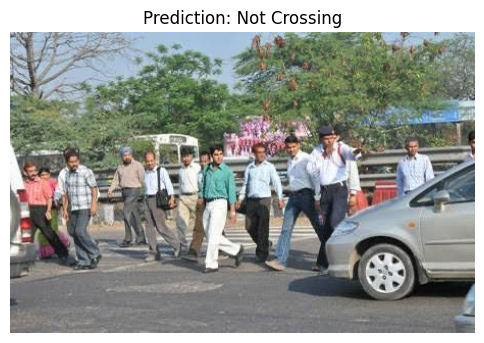

In [18]:
import matplotlib.pyplot as plt

img = cv2.imread(test_img)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {'Crossing' if pred == 1 else 'Not Crossing'}")
plt.axis('off')
plt.show()


In [19]:
from google.colab import files
print("Upload a test image:")
uploaded = files.upload()
test_img = next(iter(uploaded.keys()))


Upload a test image:


Saving WhatsApp Image 2025-07-10 at 19.08.08_7ac39cda.jpg to WhatsApp Image 2025-07-10 at 19.08.08_7ac39cda.jpg


In [20]:
feats = extract_pose_features(test_img)
if feats:
    pred = clf.predict([feats])[0]
    print(f"🧠 Prediction: {'Crossing' if pred == 1 else 'Not Crossing'}")
else:
    print("❌ Pose not detected in the image.")


🧠 Prediction: Crossing


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


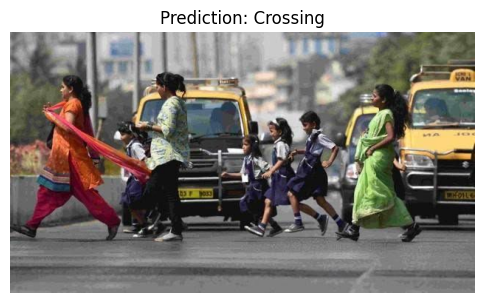

In [21]:
import matplotlib.pyplot as plt

img = cv2.imread(test_img)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {'Crossing' if pred == 1 else 'Not Crossing'}")
plt.axis('off')
plt.show()
